<a href="https://colab.research.google.com/github/aldebaro/dsp-telecom-book-code/blob/master/PythonNotebooks/dsp_106_FrequencyDomainAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install requirements and learn how to use the lasse-py module

- Install https://github.com/lasseufpa/lasse-py on your machine
- Read its README.md file
- Make sure Python can find the lasse-py module by: 1) configuring your environment variable PYTHONPATH, 2) installing the module with its setup.py or 3) using sys.path.append as below.

Before coding, make sure everything is properly installed.

In [17]:
# Clone the repository if running in Colab and install all the dependencies
if 'google.colab' in str(get_ipython()):
    import sys
    import os
    try:
      !git clone https://github.com/lasseufpa/lasse-py.git
    except:
      print("lasse-py is already in the contents")
    %cd lasse-py
    !pip install -r requirements.txt
else: # you are running locally, not in Colab
    import sys
    # make sure to set the path to where you have cloned the LASSE repository
    # under your folder specified below, you need to find lasse/dsp, lasse/audio, etc.
    sys.path.append(r"C:\github\lasse-py")
# now, verify if the module lasse.dsp can be successfully imported
try:
    import lasse.dsp
    print("SUCCESS: lasse.dsp was imported correctly.")
except ImportError as e:
    print("ERROR: failed to import lasse.dsp.")
    print(e)


SUCCESS: lasse.dsp was imported correctly.


In [18]:
# extra import commands
import numpy as np
from lasse.dsp import spectral_analysis

# Visualize a cosine of 500 Hz in frequency domain




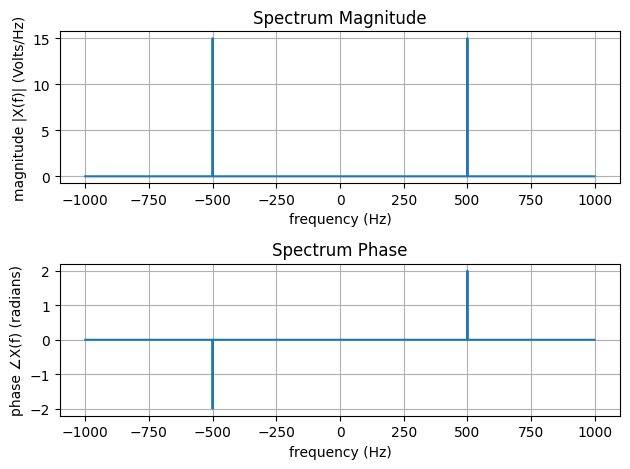

In [19]:
# generate a test signal and plot the
# full spectrum, with magnitude and phase
duration = 1.0    # duration in seconds
fc = 500   # frequency of the cosine wave
amplitude = 30 # amplitude of the cosine wave
phase = 2   # phase of the cosine wave
Fs = 4 * fc  # pick a sampling frequency in Hz
Ts = 1.0 / Fs  # sampling period in seconds
t = np.arange(0, duration, Ts)  # discrete-time vector
x = amplitude * np.cos(2 * np.pi * fc * t + phase)  # test signal
# plot the spectrum of the test signal
# set magnitude threshold to -40 dB
X, f = spectral_analysis.spectrum(x, Fs, show_plot=True, mag_threshold=-40)  

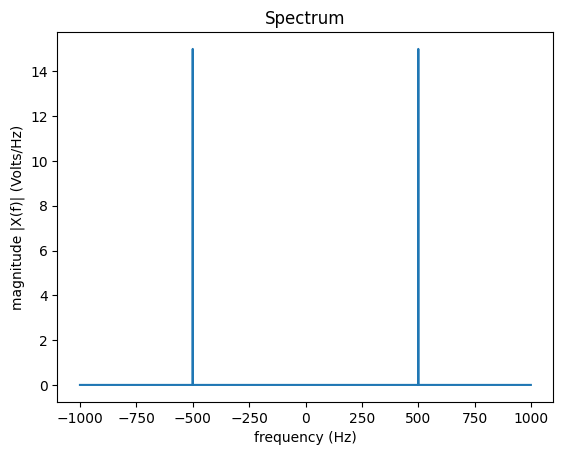

In [20]:
# now plot only the magnitude spectrum
Xmag = spectral_analysis.spectrum_magnitude(x, Fs, show_plot=True, mag_threshold=-40)

# Single spectrum cannot detect frequency variation over time

Compare the two magnitude spectra below and notice they indicate the same frequencies, in spite of being obtained from different time-domain signals.

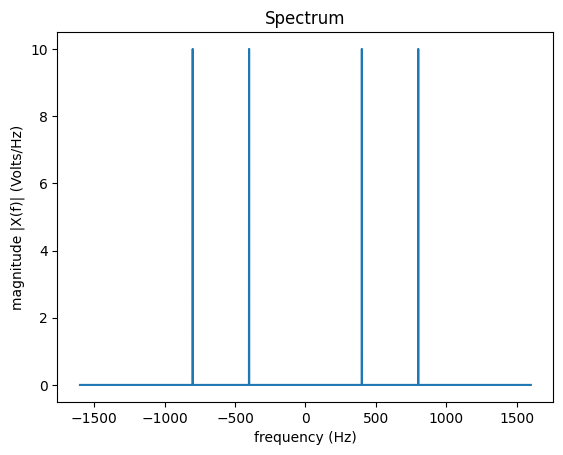

In [21]:
# generate signal x1, with two frequencies
duration = 1.0    # duration in seconds
fc1 = 400   # first frequency in Hz
fc2 = 800   # second frequency in Hz
Fs = 3200   # sampling frequency in Hz
Ts = 1.0 / Fs  # sampling period in seconds
t = np.arange(0, duration, Ts)  # discrete-time vector

x1= 20 * np.cos(2 * np.pi * fc1 * t) + 20 * np.cos(2 * np.pi * fc2 * t)
# plot the spectrum of the test signal
# set magnitude threshold to -40 dB
X1, f = spectral_analysis.spectrum_magnitude(x1, Fs, show_plot=True, mag_threshold=-40)  

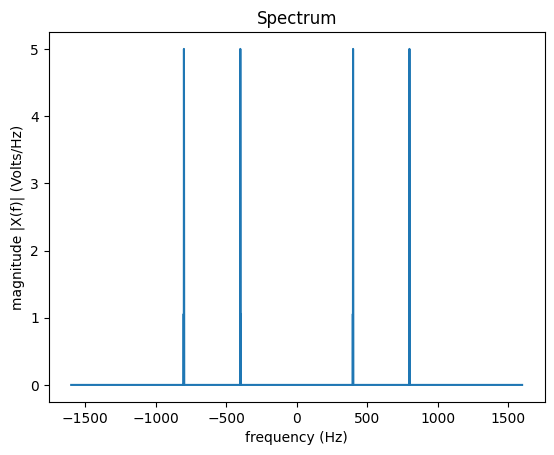

In [22]:
# create a signal by concatenating fc1 cosine with fc2 cosine over time
duration_half = 1    # half duration in seconds
fc1 = 400   # first frequency in Hz
fc2 = 800   # second frequency in Hz
Fs = 3200   # sampling frequency in Hz
Ts = 1.0 / Fs  # sampling period in seconds

# generate first half: cosine at fc1
t1 = np.arange(0, duration_half, Ts)
x_fc1 = 20 * np.cos(2 * np.pi * fc1 * t1)

# generate second half: cosine at fc2
t2 = np.arange(0, duration_half, Ts)
x_fc2 = 20 * np.cos(2 * np.pi * fc2 * t2)

# concatenate the two signals
x_concatenated = np.concatenate([x_fc1, x_fc2])

# plot the spectrum of the concatenated signal
X_conc, f = spectral_analysis.spectrum_magnitude(x_concatenated, Fs, show_plot=True, mag_threshold=-1)

# Spectrogram

Text(0.5, 1.0, 'Spectrogram of signal with two frequencies')

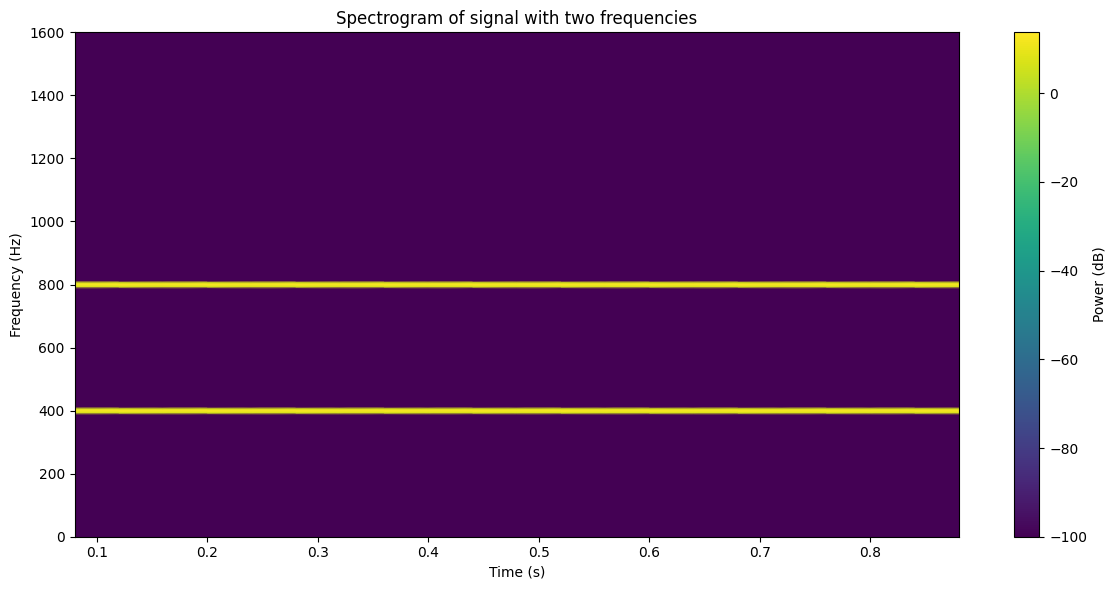

In [23]:
fig, ax = spectral_analysis.plot_spectrogram(x1, Fs)
ax.set_title("Spectrogram of signal with two frequencies")

Text(0.5, 1.0, 'Spectrogram of concatenated signal')

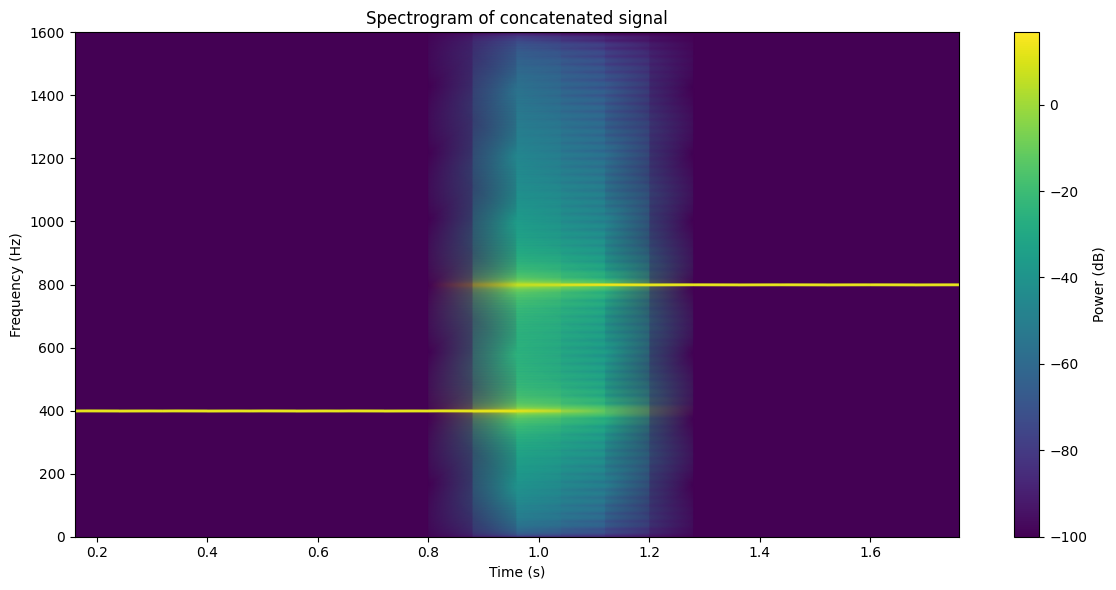

In [24]:
fig, ax = spectral_analysis.plot_spectrogram(x_concatenated, Fs)
ax.set_title("Spectrogram of concatenated signal")